## 1.数据预处理

#### 1.1 数据清洗

In [1]:
import pandas as pd
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2021.csv')

In [2]:
class DataCleaner:
    def __init__(self, df):
        self.df = df
    
    def overview(self):
        try:
            print(self.df.head())
            print(self.df.info())
        except Exception as e:
            print(f"Error in overviewing dataframe: {e}")
            
    def fill_missing_values(self):
        try:
            print(f"数据框大小： {self.df.shape}")
            self.df = self.df.dropna(how='any')
            self.df.index = range(self.df.shape[0])  # 处理索引，变连续
            print(f"删除缺失值后的数据大小： {self.df.shape}")
            # 查看是否有异常，比如数值型有‘？’等特殊字符
            print('\n 查看变量中是否有异常取值')
            for i, item in enumerate(self.df):
                print('%s:%s' % (item, self.df[item].unique()))

        except Exception as e:
            print(f"Error in filling missing values: {e}")

    def drop_duplicated(self,y_index:int):
        try:
            print(f"数据框大小： {self.df.shape}")
            print(f"Dropping duplicates based on column index {y_index}")
            # 根据第y列以外的所有列标识重复行
            duplicated_mask = self.df.duplicated(subset=self.df.columns.difference([self.df.columns[y_index]]))
            # 删除重复行
            self.df = self.df[~duplicated_mask]
            # self.df.drop_duplicates(inplace=True)  # 去除重复记录
            print(f"删除重复行后的数据框大小： {self.df.shape}")
        except Exception as e:
            print(f"Error in dropping duplicated values: {e}")

In [3]:
cleaner = DataCleaner(df)
cleaner.overview()

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0       0       1.0          1  15.0     1.0     0.0   
1              1.0       1       0.0          1  28.0     0.0     0.0   
2              1.0       1       1.0          1  33.0     0.0     0.0   
3              1.0       0       1.0          1  29.0     0.0     1.0   
4              0.0       0       0.0          1  24.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0             0       1  ...              1   
1                   1.0             0       1  ...              1   
2                   0.0             1       1  ...              1   
3                   1.0             1       1  ...              1   
4                   0.0             0       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      5.0      10.0      20.0       0.0    0   11     

In [4]:
cleaner.fill_missing_values()

数据框大小： (236378, 22)
删除缺失值后的数据大小： (236378, 22)

 查看变量中是否有异常取值
Diabetes_binary:[0. 1.]
HighBP:[0 1]
HighChol:[1. 0.]
CholCheck:[1 0]
BMI:[15. 28. 33. 29. 24. 40. 27. 30. 36. 31. 35. 22. 26. 45. 23. 25. 38. 21.
 32. 20. 34. 43. 18. 44. 19. 39. 37. 41. 16. 42. 50. 51. 49. 17. 52. 47.
 46. 56. 57. 48. 58. 61. 53. 63. 54. 68. 55. 62. 13. 59. 66. 77. 60. 87.
 64. 69. 72. 14. 75. 67. 71. 65. 82. 86. 70. 78. 12. 98. 84. 73. 74. 83.
 79. 88. 81. 76. 89. 90. 95. 85. 99. 91. 94. 92.]
Smoker:[1. 0.]
Stroke:[0. 1.]
HeartDiseaseorAttack:[0. 1.]
PhysActivity:[0 1]
Fruits:[1 0]
Veggies:[1 0]
HvyAlcoholConsump:[0 1]
AnyHealthcare:[1 0]
NoDocbcCost:[0. 1.]
GenHlth:[5. 2. 3. 4. 1.]
MentHlth:[10.  0.  5. 25.  2.  7. 30.  3. 14. 20.  8.  1. 15.  4. 28. 21. 12.  6.
 22. 27. 18. 24. 13. 17. 16.  9. 19. 29. 23. 11. 26.]
PhysHlth:[20.  0. 30. 25.  4. 10.  2.  3. 15.  8. 13. 14.  1.  5.  7.  6. 18.  9.
 16. 26. 28. 21. 27. 12. 29. 11. 17. 19. 24. 23. 22.]
DiffWalk:[0. 1.]
Sex:[0 1]
Age:[11  9 12 13 10  7  6  8  

In [5]:
cleaner.drop_duplicated(0)

数据框大小： (236378, 22)
Dropping duplicates based on column index 0
删除重复行后的数据框大小： (221994, 22)


In [6]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    202810
1.0     33568
Name: count, dtype: int64

#### 1.2可视化

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

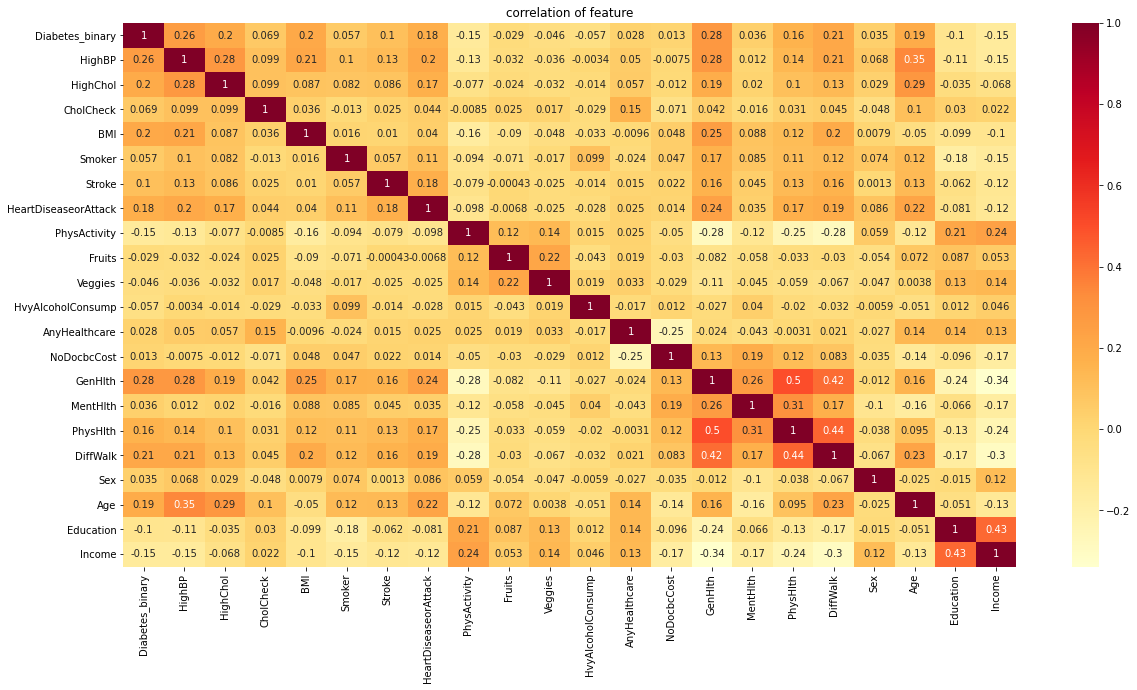

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

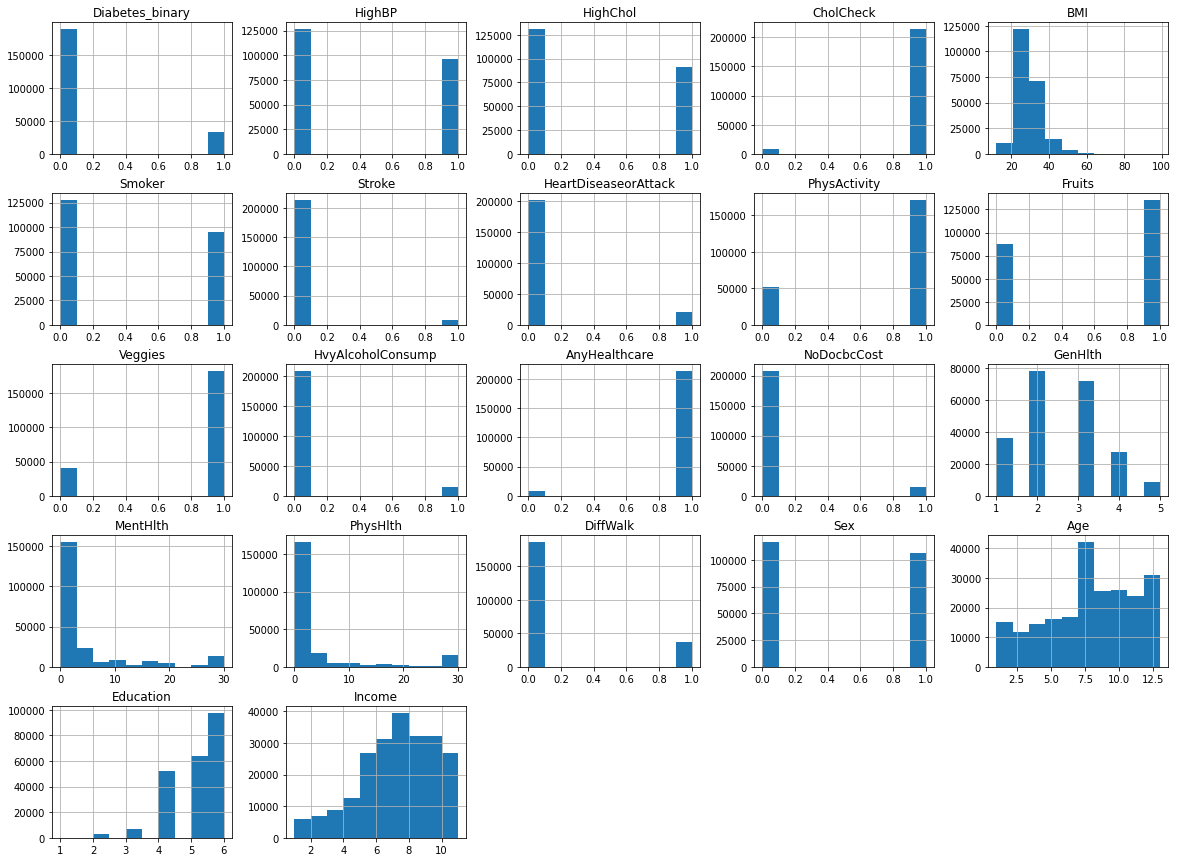

In [9]:
#数据不平衡。数据类型，大部分binary
df.hist(figsize=(20,15))

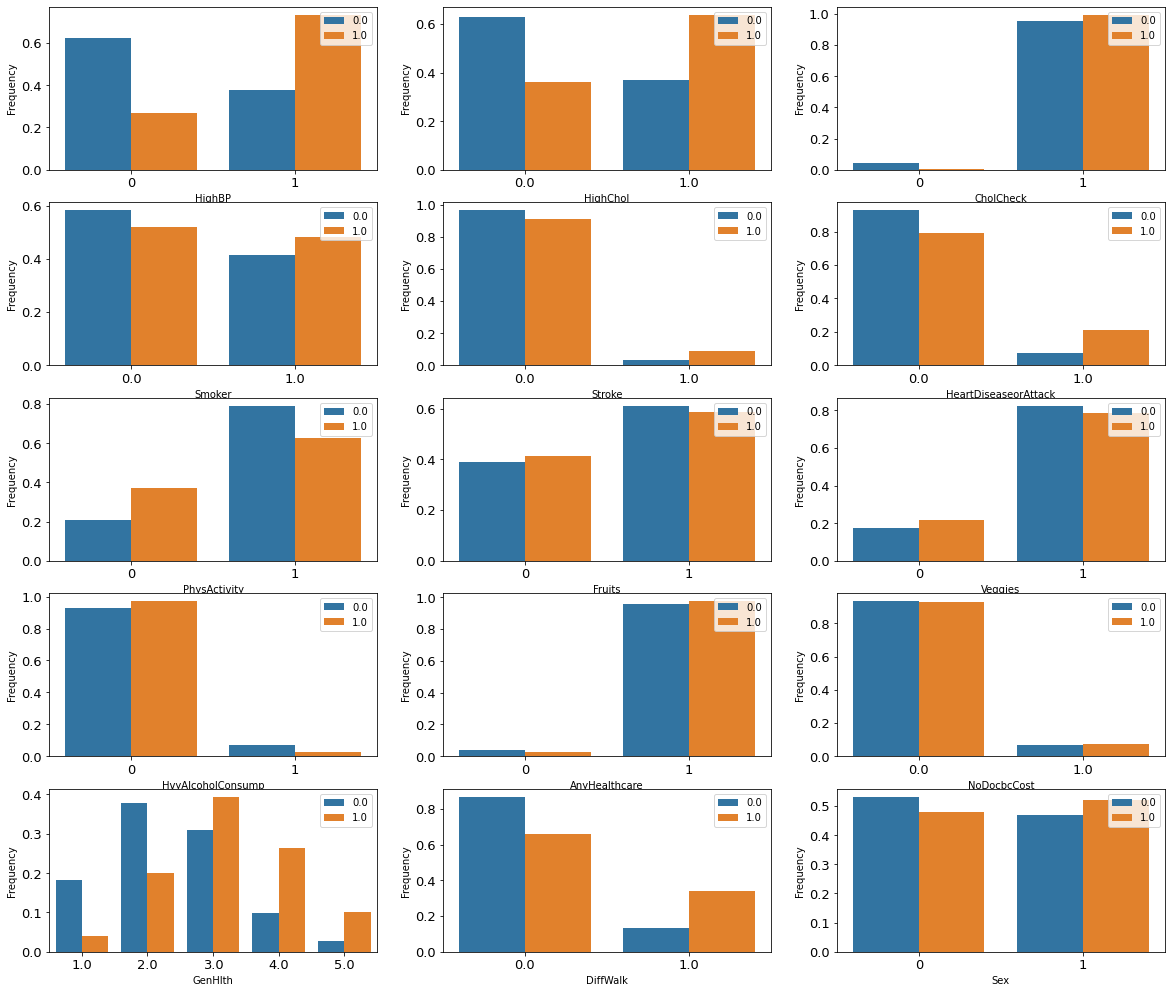

In [10]:
columns_to_drop_names = df.columns[[4,15,16,19,20,21]]
df_binary_multi = df.drop(columns_to_drop_names,axis=1)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))
for i, item in enumerate(df_binary_multi):
    if i!=0:
        ax = plt.subplot(5, 3, i)
        # Calculate the frequency of each category by normalizing the value counts
        freq_df = df_binary_multi[[item, 'Diabetes_binary']].groupby('Diabetes_binary')[item].value_counts(normalize=True).rename('frequency').reset_index()
        # Use barplot to plot the frequency
        sns.barplot(x=item, y='frequency', hue='Diabetes_binary', data=freq_df, ax=ax)

        ax.set_xlabel(str(item), fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(labelsize=13)
        ax.legend(loc='upper right', fontsize=10)

plt.subplots_adjust(top=1)  # Adjust the layout
plt.show()

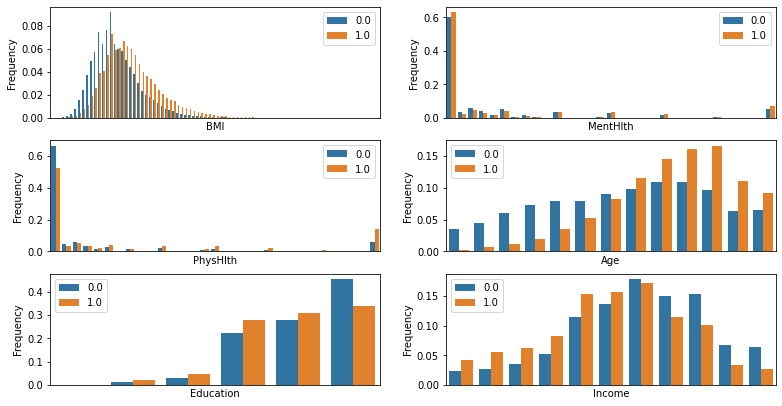

In [11]:
# 分组pdf
df_continu = df.iloc[:,[0,4,15,16,19,20,21]]
fig, axes = plt.subplots(3, 2, figsize=(13, 6))  # 创建足够的子图来绘制数据

for i, item in enumerate(df_continu):
    if i!=0:
        ax = plt.subplot(3, 2, i)
        # Calculate the frequency of each category by normalizing the value counts
        freq_df = df_continu[[item, 'Diabetes_binary']].groupby('Diabetes_binary')[item].value_counts(normalize=True).rename('frequency').reset_index()
        # Use barplot to plot the frequency
        sns.barplot(x=item, y='frequency', hue='Diabetes_binary', data=freq_df, ax=ax)

        ax.set_xlabel(str(item), fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        #ax.tick_params(labelsize=13)
        ax.set_xticks([])
        if i>3:
            ax.legend(loc='upper left', fontsize=10)
        else:
            ax.legend(loc="upper right", fontsize=10)
 
plt.subplots_adjust(top=1)  # Adjust the layout
plt.show()
#mental health各组表现情况差不多，说明心理因素不重要，可以考虑从模型中剔除

#### 1.3划分数据集

划分自变量，因变量

In [9]:
x = df.drop(df.columns[0],axis=1)
y = df[df.columns[0]]

尝试变量选择：方差；皮尔斯相关系数。调试后发现效果都不好。
可以再尝试根据可视化的结论做变量选择。

In [10]:
# # 方差特征选择效果不好
# from sklearn.feature_selection import VarianceThreshold
# # 设置阈值
# threshold_value = 0.1
# selector = VarianceThreshold(threshold=threshold_value)

# # 使用 fit_transform 进行特征选择
# x_selected = selector.fit_transform(x)
# # 获取选择后的特征列名称
# selected_feature_names = x.columns[selector.get_support()]
# selected_feature_names
# # x = x[selected_feature_names]

In [11]:
# from scipy.stats import pearsonr
# pearson_list = []
# threshold = 10
# # 遍历每个特征
# for feature in list(x.columns):
#     # 计算特征与目标变量的Pearson相关系数
#     correlation_coefficient, _ = pearsonr(x[feature], y)
#     # 将相关系数的绝对值加入列表
#     pearson_list.append(abs(correlation_coefficient))

# # 创建一个包含特征与目标变量Pearson相关系数的Series
# p_value = pd.Series(pearson_list, index=x.columns)
# # 按照相关系数的绝对值降序排序
# p_value.sort_values(ascending=False, inplace=True)
# # 选择相关性最高的特征，数量由阈值（threshold）确定
# high_score_features_pearson = list(p_value.index[:threshold])

# # 打印选择的高相关性特征
# print(high_score_features_pearson)
# x = x[high_score_features_pearson]

对二值以上的自变量进行标准化

In [12]:
from sklearn.preprocessing import StandardScaler

target_col_name = 'Diabetes_012'
cols_to_standardize = [ 'BMI','GenHlth', 'MentHlth', 'PhysHlth','Education', 'Income']
x_cols_for_scale = x.loc[:, cols_to_standardize]

scaler = StandardScaler()
x_transformed = scaler.fit_transform(x_cols_for_scale)

x_scaled_df = pd.DataFrame(x_transformed, columns=[f'{col}' for col in cols_to_standardize])
x.drop(cols_to_standardize, axis=1, inplace=True)
x = pd.concat([x, x_scaled_df], axis=1)

x.reset_index(drop=True, inplace=True)
x.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,DiffWalk,Sex,Age,BMI,GenHlth,MentHlth,PhysHlth,Education,Income
0,0,1.0,1,1.0,0.0,0.0,0,1,1,0,...,0.0,0.0,0,11,-2.129654,2.447970,0.768693,1.970522,-1.203889,-0.811406
1,1,0.0,1,0.0,0.0,1.0,0,1,0,0,...,0.0,0.0,0,11,-0.145539,-0.467110,-0.499298,-0.454929,-1.203889,-1.653354
2,1,1.0,1,0.0,0.0,0.0,1,1,1,0,...,0.0,0.0,0,9,0.617582,-0.467110,0.768693,-0.454929,-1.203889,0.030541
3,0,1.0,1,0.0,1.0,1.0,1,1,1,0,...,0.0,1.0,1,12,0.007085,2.447970,-0.499298,3.183247,-2.260766,-1.232380
4,0,0.0,1,1.0,0.0,0.0,0,0,0,0,...,0.0,1.0,1,13,-0.756036,0.504583,-0.499298,-0.454929,-0.147011,-0.390433


分层抽样，节约调试时长。

In [106]:
# # 若想节约模型训练时长，可对全部样本分层抽样
# x = df.drop(df.columns[0],axis=1)
# y = df[df.columns[0]]
# print("样本分类：",y.value_counts())
# from sklearn.model_selection import StratifiedShuffleSplit
# sample_size=50000
# # Create a StratifiedShuffleSplit object
# sss = StratifiedShuffleSplit(n_splits=1, train_size=sample_size, random_state=15)
# # Get the indices for the stratified sample
# for train_index, _ in sss.split(x, y):
#     x, y = x.iloc[train_index], y.iloc[train_index]
# print("x:", x.shape)
# print("y:", y.shape)
# print("子样本分类：",y.value_counts())
# x_prs = x[high_score_features_pearson]

样本分类： Diabetes_binary
0.0    189848
1.0     33395
Name: count, dtype: int64
x: (50000, 21)
y: (50000,)
子样本分类： Diabetes_binary
0.0    42520
1.0     7480
Name: count, dtype: int64


数据集划分函数

In [13]:
def spliting_standard(x,y,sample):
    '''
    i_of_y is the numeric colum of y. eg. i_of_y=0 means the first colum is response variable
    if sample = 'under', conduct under sampling
    'all':all the sample
    'pca':pca sample
    
    '''
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 40)
    print("x_train:", x_train.shape, 'y_train:',y_train.shape) # train = 训练集+测试集
    print("x_test:", x_test.shape,'y_test:',y_test.shape)
    print("训练集样本分类：",y_train.value_counts())
    
    if sample == 'all':
        return x_train, x_test, y_train, y_test
    
    # 欠采样
    elif sample == 'under':
        from imblearn.under_sampling import RandomUnderSampler
        rus = RandomUnderSampler(random_state=42)
        x_train_un, y_train_un = rus.fit_resample(x_train, y_train)
        print("欠采样训练集样本分类：",y_train_un.value_counts())
        return x_train_un, x_test, y_train_un, y_test
    
    # 过采样
    elif sample == 'over':
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(random_state=42)
        x_train_ov, y_train_ov = ros.fit_resample(x_train, y_train)
        print("过采样训练集样本分类：",y_train_ov.value_counts())
        return x_train_ov, x_test, y_train_ov, y_test
    
    # nearmiss
    elif sample == 'nearmiss':
        # 自变量个数多于15时，函数报错
        from imblearn.under_sampling import NearMiss
        nm = NearMiss(version = 1 , n_neighbors = 5)
        x_train_nm, y_train_nm = nm.fit_resample(x_train, y_train)
        print("nearmiss欠采样训练集样本分类：",y_train_nm.value_counts())
        return x_train_nm, x_test, y_train_nm, y_test

    # smote
    elif sample == 'smote':
        # 自变量个数多于15时，函数报错
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        x_train_st, y_train_st = smote.fit_resample(x_train, y_train)
        print("nearmiss欠采样训练集样本分类：",y_train_st.value_counts())
        return x_train_st, x_test, y_train_st, y_test
    
    # pca降维后再划分数据集
    elif sample == 'pca':
        from sklearn.decomposition import PCA
        pca = PCA(n_components=0.85) 
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test) # x_train_pca 和 x_test_pca 包含了降维后的数据
        return x_train_pca, x_test, y_train_pca, y_test
        
#         # 查看每个主成分的因子系数（载荷）
#         loadings_df = pd.DataFrame(pca.components_, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
#         print("Principal Components Loadings:")
#         print(loadings_df)
#         # 查看每个主成分的方差解释比例
#         explained_variance_ratio = pca.explained_variance_ratio_
#         print("\nExplained Variance Ratio:", explained_variance_ratio)
#         print("Train data of x:", x_train_pca.shape) # train = 训练集+测试集
#         print("Test data of x:", x_test_pca.shape)
#         return x_train_pca, x_test_pca, y_train, y_test

In [14]:
# 样本划分
# 原始数据
x_train, x_test, y_train, y_test = spliting_standard(x,y,'all')
print('\n')
# 欠采样
x_train_un, x_test_un, y_train_un, y_test_un = spliting_standard(x,y,'under')
print('\n')
# 过采样
x_train_ov, x_test_ov, y_train_ov, y_test_ov = spliting_standard(x,y,'over')
print('\n')
# pearson降维+欠采样
# x_train_psp, x_test_psp, y_train_psp, y_test_psp = spliting_standard(x_prs,y,'under')

x_train: (212740, 21) y_train: (212740,)
x_test: (23638, 21) y_test: (23638,)
训练集样本分类： Diabetes_binary
0.0    182479
1.0     30261
Name: count, dtype: int64


x_train: (212740, 21) y_train: (212740,)
x_test: (23638, 21) y_test: (23638,)
训练集样本分类： Diabetes_binary
0.0    182479
1.0     30261
Name: count, dtype: int64
欠采样训练集样本分类： Diabetes_binary
0.0    30261
1.0    30261
Name: count, dtype: int64


x_train: (212740, 21) y_train: (212740,)
x_test: (23638, 21) y_test: (23638,)
训练集样本分类： Diabetes_binary
0.0    182479
1.0     30261
Name: count, dtype: int64
过采样训练集样本分类： Diabetes_binary
0.0    182479
1.0    182479
Name: count, dtype: int64




### 2.建模

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm

对原始数据、欠采样数据、过采样数据，分别计算模型性能指标

In [16]:
def model_fitting(x_train,x_test,y_train,y_test,fs):
    pred_list = []
    # models = {'LR': LogisticRegression()}
    # 'KNN': KNeighborsClassifier(n_neighbors= 6),
    models ={
        'LR': LogisticRegression(C=0.5, penalty='l2',max_iter=1000),
        'RF': RandomForestClassifier(max_depth=4,n_estimators=200, class_weight='balanced',min_samples_split=4000, min_samples_leaf=500),
        'DT': DecisionTreeClassifier(max_depth=4, class_weight='balanced',min_samples_split=4000, min_samples_leaf=500),
        'XGB': XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, 
                             scale_pos_weight=sum(y_train==0)/sum(y_train==1),max_depth=4,n_estimators=200,
                            subsample=0.8,colsample_bytree=0.8)
    }

    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []
    
    train_roc_list = []
    train_accuracy_list = []
    train_f1_list = []
    train_recall_list = []
    train_precision_list = []

    for name ,model in tqdm(models.items(), desc='Fitting models', unit='model'):
        model.fit(x_train, y_train)
        y_pred = model.predict_proba(x_test)[:,1]
        y_train_pred = model.predict_proba(x_train)[:, 1]
        
        pred_list.append({
            "model": name,
            "fs": fs, #写成函数的传入参数，为all;pca
            "data": y_pred
        })
        
        roc_list.append(metrics.roc_auc_score(y_test,y_pred))
        train_roc_list.append(metrics.roc_auc_score(y_train, y_train_pred))
        
        y_pred = [0 if (y<0.55)else 1 for y in y_pred]
                
        accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
        f1_list.append(metrics.f1_score(y_test,y_pred))
        recall_list.append(metrics.recall_score(y_test,y_pred))
        precision_list.append(metrics.precision_score(y_test,y_pred))
        
        y_train_pred = [0 if (y < 0.55) else 1 for y in y_train_pred]

        train_accuracy_list.append(metrics.accuracy_score(y_train, y_train_pred))
        train_f1_list.append(metrics.f1_score(y_train, y_train_pred))
        train_recall_list.append(metrics.recall_score(y_train, y_train_pred))
        train_precision_list.append(metrics.precision_score(y_train, y_train_pred))
        
    names = [name for name in models]
    evaluation = pd.DataFrame({'classifiers': names,'feature': fs,'AUC Score': roc_list, 'Accuracy':accuracy_list,'Precision':precision_list,'Recall':recall_list, 'F-measure':f1_list})
    
    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)
    
    train_evaluation = pd.DataFrame({
    'classifiers': names,
    'feature': fs,
    'Train AUC Score': train_roc_list,
    'Train Accuracy': train_accuracy_list,
    'Train Precision': train_precision_list,
    'Train Recall': train_recall_list,
    'Train F-measure': train_f1_list
    })

    train_evaluation = train_evaluation.sort_values(by='Train AUC Score', ascending=False)
    print(train_evaluation)

#### 2.1 全变量+类别不平衡处理

In [55]:
model_fitting(x_train,x_test,y_train,y_test,'all')
model_fitting(x_train_un, x_test_un, y_train_un, y_test_un,'un')
model_fitting(x_train_ov, x_test_ov, y_train_ov, y_test_ov,'ov')

Fitting models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:56<00:00, 14.22s/model]


  classifiers feature  AUC Score  Accuracy  Precision    Recall  F-measure
3         XGB     all   0.814499  0.741306   0.328603  0.732719   0.453724
0          LR     all   0.810009  0.857027   0.566942  0.105376   0.177720
1          RF     all   0.800267  0.755495   0.334552  0.674962   0.447363
2          DT     all   0.779623  0.704324   0.295108  0.732104   0.420653
  classifiers feature  Train AUC Score  Train Accuracy  Train Precision  \
3         XGB     all         0.832505        0.750333         0.342118   
0          LR     all         0.811223        0.856692         0.572743   
1          RF     all         0.803292        0.758206         0.338612   
2          DT     all         0.782111        0.706037         0.297888   

   Train Recall  Train F-measure  
3      0.751443         0.470175  
0      0.109866         0.184366  
1      0.671556         0.450216  
2      0.732532         0.423540  


Fitting models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.96s/model]


  classifiers feature  AUC Score  Accuracy  Precision    Recall  F-measure
3         XGB      un   0.813337  0.736532   0.324207  0.734869   0.449920
0          LR      un   0.810387  0.752883   0.336557  0.705684   0.455754
1          RF      un   0.798089  0.758739   0.337308  0.669124   0.448517
2          DT      un   0.777937  0.711126   0.299007  0.721659   0.422824
  classifiers feature  Train AUC Score  Train Accuracy  Train Precision  \
3         XGB      un         0.840635        0.757707         0.759531   
0          LR      un         0.811796        0.730495         0.745836   
1          RF      un         0.801447        0.720530         0.748365   
2          DT      un         0.780882        0.715964         0.713227   

   Train Recall  Train F-measure  
3      0.754193         0.756853  
0      0.699294         0.721815  
1      0.664494         0.703940  
2      0.722381         0.717775  


Fitting models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [01:35<00:00, 23.94s/model]

  classifiers feature  AUC Score  Accuracy  Precision    Recall  F-measure
3         XGB      ov   0.813475  0.742477   0.329501  0.730876   0.454224
0          LR      ov   0.810475  0.752838   0.336364  0.704762   0.455385
1          RF      ov   0.800716  0.754324   0.334288  0.681413   0.448534
2          DT      ov   0.779516  0.711126   0.299007  0.721659   0.422824
  classifiers feature  Train AUC Score  Train Accuracy  Train Precision  \
3         XGB      ov         0.833644        0.751623         0.751507   
0          LR      ov         0.811134        0.730609         0.746446   
1          RF      ov         0.803838        0.723054         0.746113   
2          DT      ov         0.782622        0.717066         0.714495   

   Train Recall  Train F-measure  
3      0.751855         0.751681  
0      0.698480         0.721667  
1      0.676206         0.709442  
2      0.723060         0.718752  


#### 2.2 选变量(根据可视化结果)+类别不平衡处理

In [19]:
features = ['HighBP','HighChol','BMI','HeartDiseaseorAttack','GenHlth']
x_sub = df.loc[:,features]

In [20]:
# nearmiss欠采样
x_train_nm, x_test_nm, y_train_nm, y_test_nm = spliting_standard(x_sub,y,'nearmiss')
print('\n')
# smote过采样
x_train_sm, x_test_sm, y_train_sm, y_test_sm = spliting_standard(x_sub,y,'smote')
print('\n')

x_train: (207683, 5) y_train: (207683,)
x_test: (23076, 5) y_test: (23076,)
训练集样本分类： Diabetes_012
0.0    177482
1.0     30201
Name: count, dtype: int64
nearmiss欠采样训练集样本分类： Diabetes_012
0.0    30201
1.0    30201
Name: count, dtype: int64


x_train: (207683, 5) y_train: (207683,)
x_test: (23076, 5) y_test: (23076,)
训练集样本分类： Diabetes_012
0.0    177482
1.0     30201
Name: count, dtype: int64
nearmiss欠采样训练集样本分类： Diabetes_012
1.0    177482
0.0    177482
Name: count, dtype: int64




In [24]:
model_fitting(x_train_nm, x_test_nm, y_train_nm, y_test_nm,'nm')
model_fitting(x_train_sm, x_test_sm, y_train_sm, y_test_sm,'st')

Fitting models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.01model/s]


  classifiers feature  AUC Score  Accuracy  Precision    Recall  F-measure
0          LR      nm   0.797221  0.754810   0.328800  0.653401   0.437463
1          RF      nm   0.794416  0.740076   0.317266  0.678349   0.432330
2          DT      nm   0.785487  0.739166   0.317255  0.683695   0.433399
3         XGB      nm   0.778064  0.709958   0.294234  0.706267   0.415407
  classifiers feature  Train AUC Score  Train Accuracy  Train Precision  \
3         XGB      nm         0.813068        0.735671         0.741722   
0          LR      nm         0.802586        0.723254         0.750139   
1          RF      nm         0.795407        0.717145         0.732768   
2          DT      nm         0.786647        0.715705         0.730953   

   Train Recall  Train F-measure  
3      0.723155         0.732321  
0      0.669514         0.707537  
1      0.683587         0.707323  
2      0.682693         0.705999  


Fitting models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:27<00:00,  6.90s/model]

  classifiers feature  AUC Score  Accuracy  Precision    Recall  F-measure
0          LR      st   0.797384  0.752643   0.326670  0.655183   0.435968
3         XGB      st   0.797009  0.737910   0.315941  0.683398   0.432113
1          RF      st   0.795599  0.737650   0.316437  0.687853   0.433464
2          DT      st   0.784101  0.760920   0.332136  0.631720   0.435370
  classifiers feature  Train AUC Score  Train Accuracy  Train Precision  \
3         XGB      st         0.807942        0.731626         0.740718   
0          LR      st         0.799623        0.721532         0.745615   
1          RF      st         0.798157        0.724558         0.736027   
2          DT      st         0.786985        0.713089         0.748223   

   Train Recall  Train F-measure  
3      0.712743         0.726461  
0      0.672508         0.707177  
1      0.700263         0.717699  
2      0.642319         0.691238  


#### 2.3 选变量（逻辑回归）+ 全部数据

In [40]:
from sklearn.feature_selection import RFE

# 创建逻辑回归模型
logistic_model = LogisticRegression(C=0.5, penalty='l2',solver='sag')

# 使用RFE进行特征选择
rfe = RFE(logistic_model, n_features_to_select=5)  # 选择的特征数量
rfe.fit(x_train_un, y_train_un)

# 输出选择的特征
selected_features = x_train_un.columns[rfe.support_]
selected_features

Index(['HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'col_GenHlth'], dtype='object')

In [41]:
x_sub = df.loc[:,features]

In [44]:
import statsmodels.api as sm

# 假设你的数据框名为 df，包含目标变量 'target' 和特征变量 'feature1', 'feature2', ...
xl = df.loc[:,features]
yl = df[df.columns[0]]

# 添加截距项
xl = sm.add_constant(xl)

# 拟合 logistic 回归模型
model = sm.Logit(yl, xl)
result = model.fit()

# 打印回归系数和统计信息
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.339468
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:               230759
Model:                          Logit   Df Residuals:                   230753
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.1815
Time:                        10:01:34   Log-Likelihood:                -78335.
converged:                       True   LL-Null:                       -95711.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.7904      0.034   -172.076      0.000      -5.856      -5.724